<a href="https://colab.research.google.com/github/jennkimerson/German_Syntax/blob/main/Syntax_Tree_German_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
# import nltk settings
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

from nltk import pos_tag, word_tokenize, RegexpParser

!pip install HanTa

from HanTa import HanoverTagger as ht

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [49]:
# import tree visualization setup
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.

%matplotlib inline

!apt install ghostscript python3-tk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.9).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ghostscript is already the newest version (9.26~dfsg+0-0ubuntu0.18.04.14).
python3-tk is already the newest version (3.6.9-1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


# Example sentences to demo:

Ich habe keine Ahnung, was du sagst

Mein Mutter sind sehr nett

In [52]:
# input sentence
sentence = input("Enter your sentence: ")
print(sentence)

Enter your sentence: Ich habe keine Ahnung, was du sagst
Ich habe keine Ahnung, was du sagst


[('ich', 'PPER'), ('haben', 'VAFIN'), ('keine', 'PIAT'), ('Ahnung', 'NN'), ('was', 'PRELS'), ('du', 'PPER'), ('sagen', 'VVFIN')]
(S
  (IP (NP ich/PPER) (VP (V haben/VAFIN) (NP keine/PIAT Ahnung/NN)))
  (CC (C was/PRELS) (IP (NP du/PPER) (VP (V sagen/VVFIN)))))


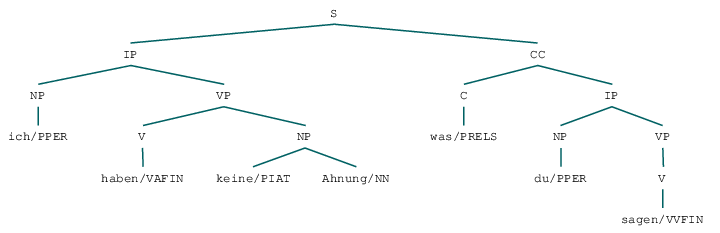

In [53]:
# tokenization
tokenized_sent = nltk.tokenize.word_tokenize(sentence,language='german')

# lemmatization
tagger = ht.HanoverTagger('morphmodel_ger.pgz')

# part of speech tagging
tags = tagger.tag_sent(tokenized_sent)
pos_tags = [tag[1:] for tag in tags if tag[2] != '$,']
print(pos_tags)

# grammatical rules
chunker = RegexpParser("""
                       S: {<NP> <VP>}
                       S: {<S> <CC>}
                       C:{<KOUS|PWS|PRELS>}
                       NP: {<DT>?<JJ|PIAT>*<NN|PPOSAT>*} #To extract Noun Phrases
                       NP: {<PPER|PDS|NE>}
                       P: {<IN>}                        #To extract Prepositions
                       V: {<V.*>}                       #To extract Verbs
                       PP: {<P|APPR> <NP>}              #To extract Prepostional Phrases
                       VP: {<V> <NP|PP|V|ADVP|ADJD>*}   #To extarct Verb Phrases
                       ADVP: {<ADV> <ADV|ADJD>}         #To extract Adverbil Phrases
                       IP: {<NP|,>+<VP>?}
                       CC:{<C|,>+<IP>?}
                       """)

output = chunker.parse(pos_tags)
print(output)

from nltk.tree import Tree
from IPython.display import display

tree = Tree.fromstring(str(output))
display(tree)